In [ ]:
#Importation of Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from joblib import Parallel, delayed
import time
import warnings
import os

In [ ]:
# Step 2: Load Dataset
df = pd.read_csv("/content/flood21.csv")
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [ ]:
#Dataset Discription
print("Dataset Shape: ",df.shape)

print("\nMissing Values:")
df.isnull().sum()

Dataset Shape:  (999, 21)

Missing Values:


,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0
Encroachments,0


In [ ]:
#Eradication of Missing Values
# Handle categorical severity
if 'Severity category' in df.columns:
    severity_map = {'Low':0, 'Medium':1, 'High':2, 'Highest':3}
    df['Severity category'] = df['Severity category'].map(severity_map).fillna(-1)

# Keeping only numeric values
numeric_cols = df.select_dtypes(include=[np.number]).columns
df = df[numeric_cols]

# Filling in the  missing values
df = df.fillna(df.median())

#selection of the proper features
features = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization']
target = 'FloodProbability' # Corrected column name
X = df[features]
y = df[target]

#Conducting train split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [ ]:
print("\nAfter Cleaning - Missing Values:\n", df.isnull().sum())


After Cleaning - Missing Values:
 MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


In [ ]:
print(df.columns)

In [186]:
df['UrbanDrainageInteraction'] = df['Urbanization'] * df['DrainageSystems']
df['DeforestationSlopeEffect'] = df['Deforestation'] * df['Landslides']
df['ClimatePopulation'] = df['ClimateChange'] * df['PopulationScore']


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_cols = df.columns.drop('FloodProbability')  # keep target untouched
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])


In [187]:
from sklearn.ensemble import RandomForestRegressor
X = df.drop(columns='FloodProbability')
y = df['FloodProbability']
model = RandomForestRegressor()
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)
print(top_features)


TotalRiskScore              0.367194
MaxRiskFactor               0.302879
AverageRiskScore            0.277350
DeforestationSlopeEffect    0.010304
UrbanDrainageInteraction    0.008504
ClimatePopulation           0.004983
Encroachments               0.002990
WetlandLoss                 0.002381
Landslides                  0.002052
Watersheds                  0.001957
dtype: float64


In [188]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca_features = pca.fit_transform(df.drop(columns='FloodProbability'))


In [ ]:
#step-3 preparing features and scale
features = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization']
target = 'FloodProbability'

X = df[features]
y = df[target]

/tmp/ipython-input-14-1974903276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FloodProbability', data=df, palette='Set2')


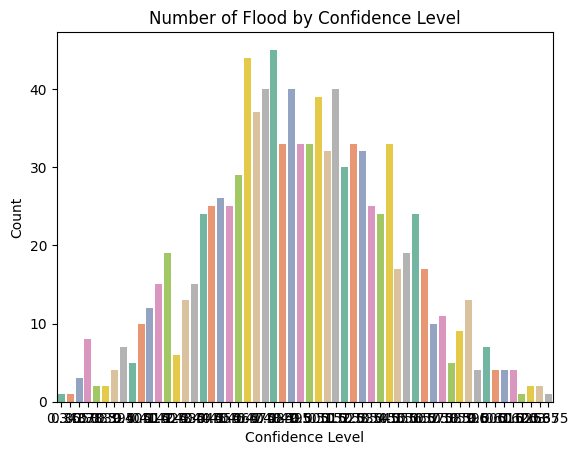

In [ ]:
#visualization
# Count of risk categories-barchart
sns.countplot(x='FloodProbability', data=df, palette='Set2')
plt.title("Number of Flood by Confidence Level")
plt.xlabel("Confidence Level")
plt.ylabel("Count")
plt.show()

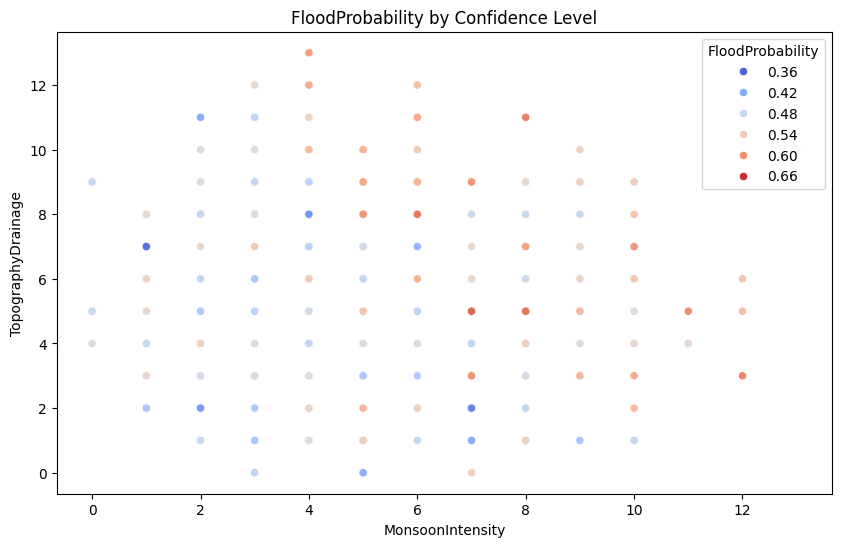

In [ ]:
# Visualize location of flood (color by risk)
plt.figure(figsize=(10,6))
sns.scatterplot(x='MonsoonIntensity', y='TopographyDrainage', hue='FloodProbability', data=df, palette='coolwarm')
plt.title("FloodProbability by Confidence Level")
plt.xlabel("MonsoonIntensity")
plt.ylabel("TopographyDrainage")
plt.legend(title="FloodProbability")
plt.show()

/tmp/ipython-input-16-3689996973.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MonsoonIntensity', y='FloodProbability', data=df, palette='muted')


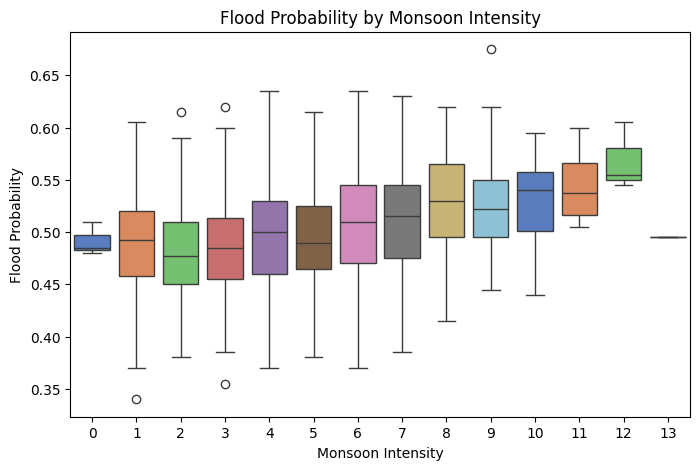

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='MonsoonIntensity', y='FloodProbability', data=df, palette='muted')
plt.title("Flood Probability by Monsoon Intensity")
plt.xlabel("Monsoon Intensity")
plt.ylabel("Flood Probability")
plt.show()

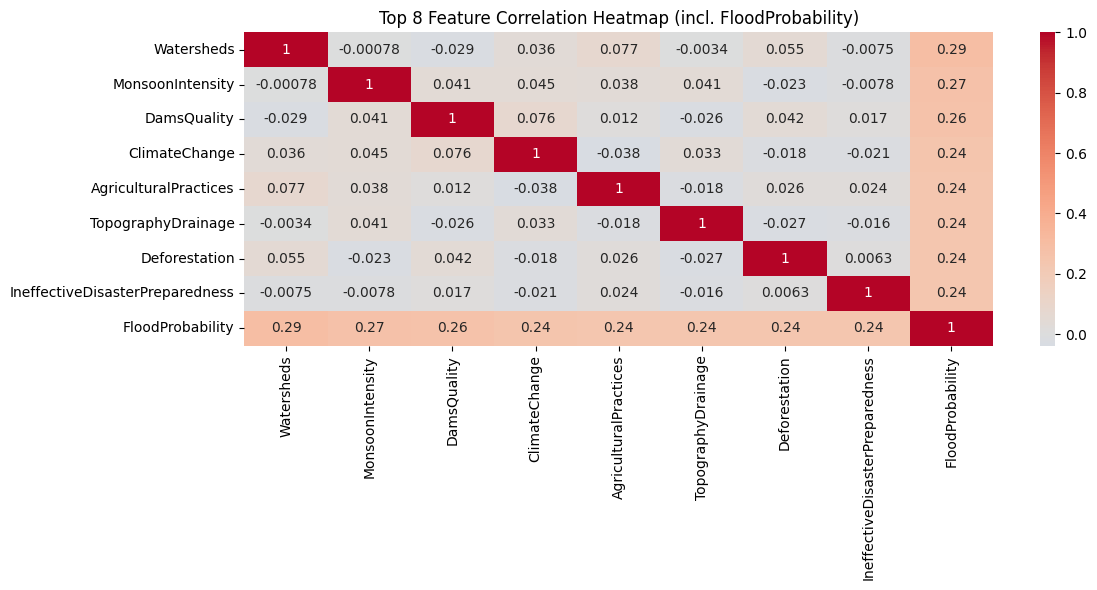

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and includes 'FloodProbability'
corr_matrix = df.corr()

# Get top 8 features most correlated with FloodProbability
top_features = corr_matrix['FloodProbability'].abs().sort_values(ascending=False)[1:9].index

# Subset the correlation matrix to only include top features + FloodProbability
selected_features = list(top_features) + ['FloodProbability']
small_corr = df[selected_features].corr()

# Plot the smaller heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(small_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Top 8 Feature Correlation Heatmap (incl. FloodProbability)')
plt.tight_layout()
plt.show()


In [ ]:
#selection of the proper features
features = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization']
target = 'FloodProbability' # Corrected column name
X = df[features]
y = df[target]

In [ ]:
#Spliting and Scaling of the Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
#Pipeline
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Model Optimization
start_time = time.time()
rf_non_parallel = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=1
)
rf_non_parallel.fit(X_train_scaled, y_train)
non_parallel_time = time.time() - start_time
y_pred_non_parallel = rf_non_parallel.predict(X_test_scaled)

In [ ]:
#Parallel Implementation
def train_forest(X, y, n_estimators=10):
    """Train a subset of the forest in parallel"""
    return RandomForestRegressor(
        n_estimators=n_estimators,
        random_state=np.random.randint(1000),
        n_jobs=1
    ).fit(X, y)

start_time = time.time()
n_trees = 100
n_jobs = -1

# Splitting of total trees
trees_per_job = max(1, n_trees // (n_jobs if n_jobs != -1 else 1))
forests = Parallel(n_jobs=n_jobs)(
    delayed(train_forest)(X_train_scaled, y_train, trees_per_job)
    for _ in range(n_jobs if n_jobs != -1 else os.cpu_count())
)

# Concluding the prediction
y_pred_parallel = np.mean([forest.predict(X_test_scaled) for forest in forests], axis=0)
parallel_time = time.time() - start_time


In [ ]:
 #Evaluation
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print("="*50)
    return r2, mse

# Evaluate both models
r2_non_parallel, _ = evaluate_model(y_test, y_pred_non_parallel, "Non-Parallel RF")
r2_parallel, _ = evaluate_model(y_test, y_pred_parallel, "Parallel RF")

print("\nPerformance Comparison:")
print(f"Non-Parallel Training Time: {non_parallel_time:.4f}s")
print(f"Parallel Training Time: {parallel_time:.4f}s")
print(f"Speedup: {non_parallel_time/parallel_time:.2f}x")
print(f"R² Improvement: {r2_parallel-r2_non_parallel:.4f}")

Non-Parallel RF Evaluation:
R² Score: 0.2512
MSE: 0.0020
Parallel RF Evaluation:
R² Score: 0.2552
MSE: 0.0019

Performance Comparison:
Non-Parallel Training Time: 0.2801s
Parallel Training Time: 2.8879s
Speedup: 0.10x
R² Improvement: 0.0040


In [ ]:
#Visualization
plt.figure(figsize=(16, 6))

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

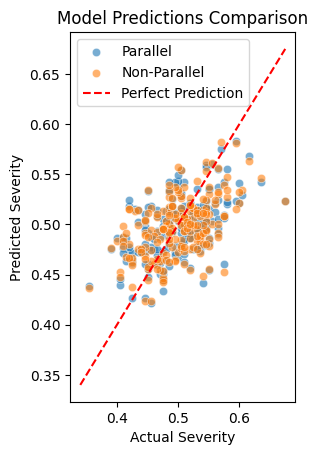

In [ ]:
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_parallel, alpha=0.6, label='Parallel')
sns.scatterplot(x=y_test, y=y_pred_non_parallel, alpha=0.6, label='Non-Parallel')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')
plt.title('Model Predictions Comparison')
plt.xlabel('Actual Severity')
plt.ylabel('Predicted Severity')
plt.legend()

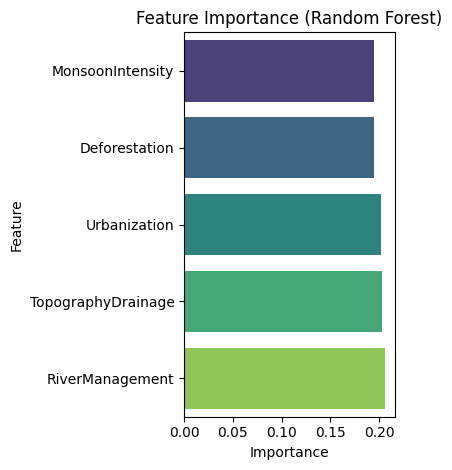

In [ ]:
plt.subplot(1, 2, 2)
importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf_non_parallel.feature_importances_
}).sort_values('Importance', ascending=True)
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis', hue='Feature', legend=False)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

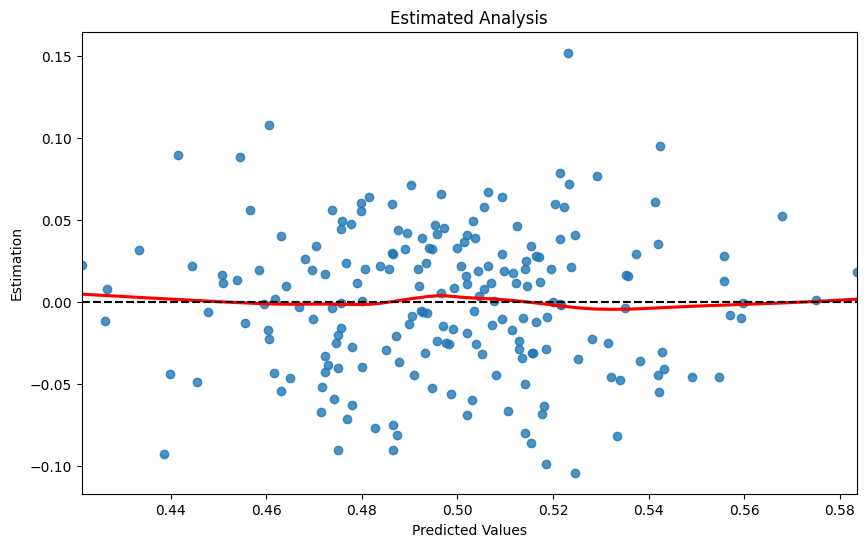

In [ ]:
#Final Conclusion
residuals = y_test - y_pred_parallel
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_parallel, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Estimated Analysis')
plt.xlabel('Predicted Values')
plt.ylabel('Estimation')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()